In [1]:
%matplotlib inline

In [2]:
import pandas_ml as pdml

/Users/sin/miniconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4, 3)

In [4]:
import sklearn.datasets as datasets
iris = pdml.ModelFrame(datasets.load_iris())
iris.head()

,.target,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


In [5]:
diabetes = pdml.ModelFrame(datasets.load_diabetes())
diabetes.columns = ['col{0}'.format(c) if isinstance(c, int) else c for c in diabetes.columns]
diabetes.head()

,.target,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## Joint Plot

Calling ``sns.jointplot`` shows distributions of the specified column as x-axis and ``target`` as y-axis by default.

/Users/sin/miniconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


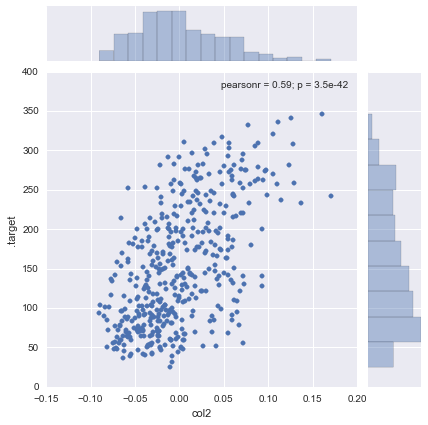

In [6]:
diabetes.sns.jointplot('col2');

You can change y-axis by Specifying ``y`` keyword.

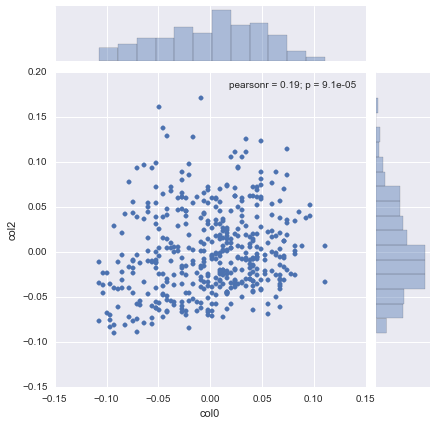

In [7]:
diabetes.sns.jointplot(x='col0', y='col2')

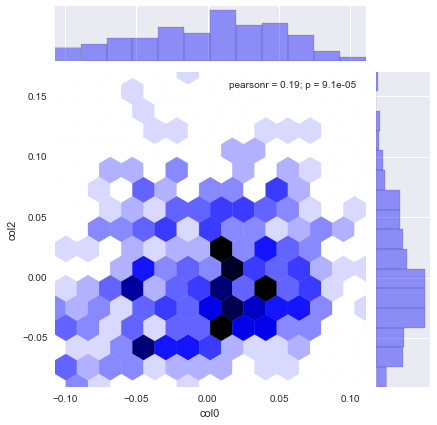

In [8]:
diabetes.sns.jointplot('col0', 'col2', kind="hex", color="b");

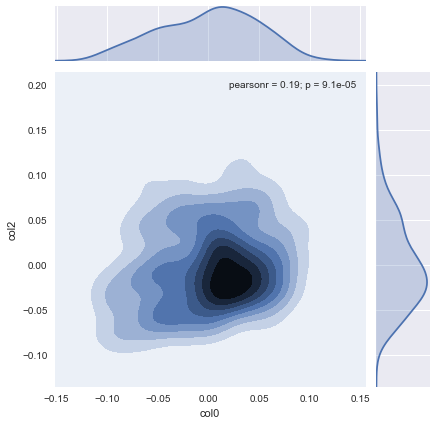

In [9]:
diabetes.sns.jointplot('col0', 'col2', kind="kde");

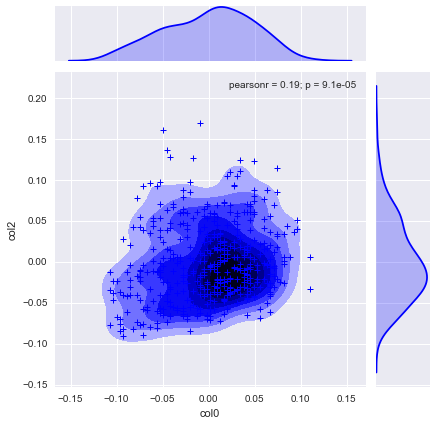

In [10]:
g = diabetes.sns.jointplot('col0', 'col2', kind="kde", color="b")
g.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0);

## Pair Plot

Calling ``sns.pairplot`` plots pairwise relationships of the dataset.

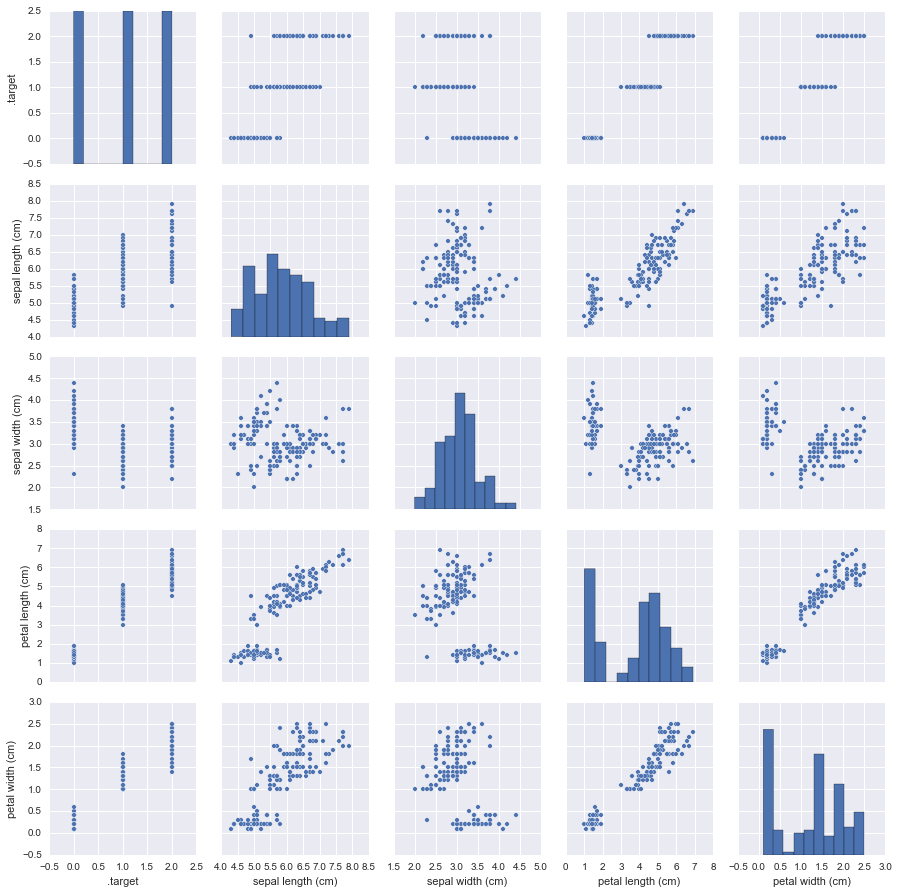

In [11]:
iris.sns.pairplot();

/Users/sin/miniconda/envs/py27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


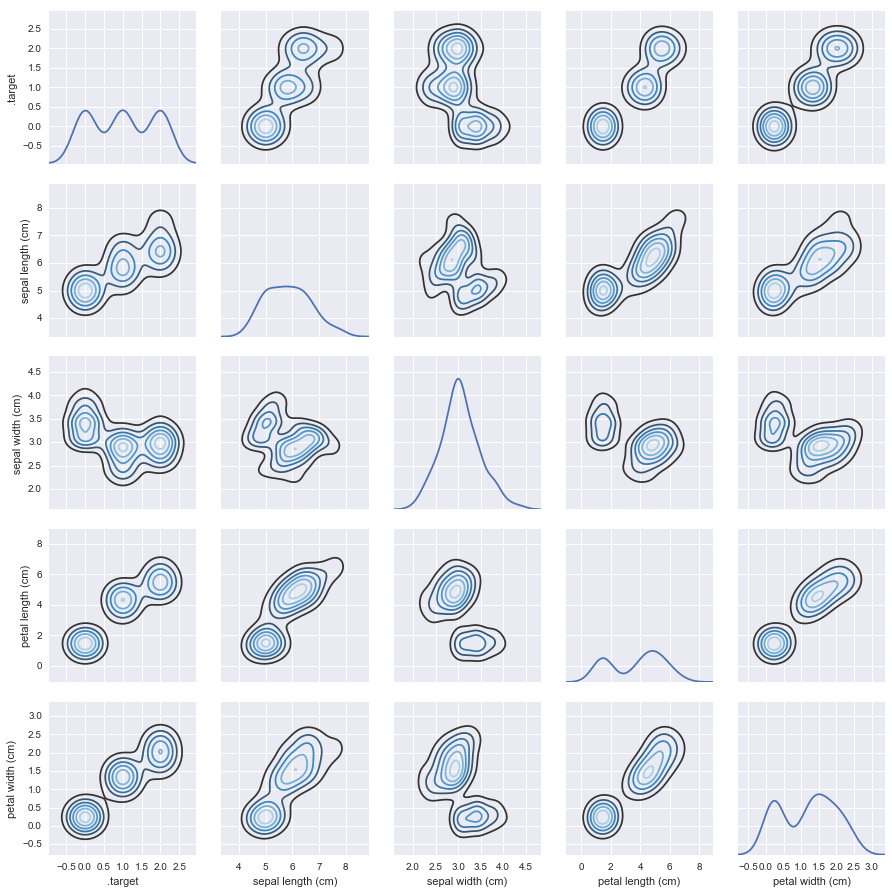

In [12]:
import seaborn as sns
g = iris.sns.PairGrid()
g.map_diag(iris.sns.kdeplot)
g.map_offdiag(iris.sns.kdeplot, cmap="Blues_d", n_levels=6);

## Dist plot

Calling ``sns.distplot`` shows a distribution of the ``target`` colum by default.

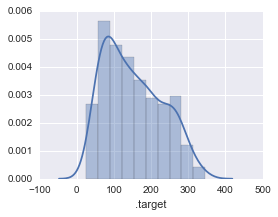

In [13]:
diabetes.sns.distplot();

You can specify options as the same as ``seaborn``.

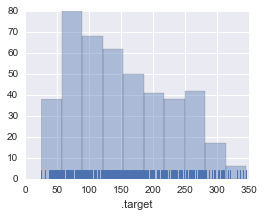

In [14]:
diabetes.sns.distplot(kde=False, rug=True);

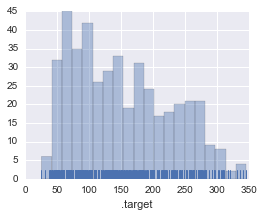

In [15]:
diabetes.sns.distplot(bins=20, kde=False, rug=True);

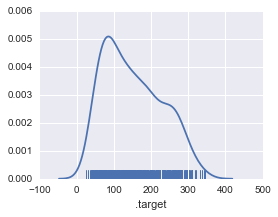

In [16]:
diabetes.sns.distplot(hist=False, rug=True);

Specifying the column name shows distribution of the specified column.

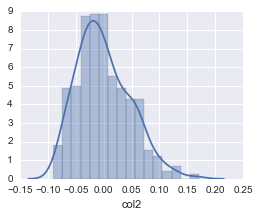

In [17]:
diabetes.sns.distplot(a='col2');

## Kde plot

``kdeplot`` works almost the same as ``distplot``

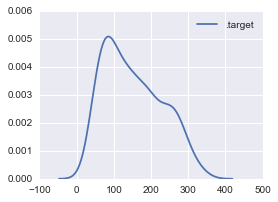

In [18]:
diabetes.sns.kdeplot();

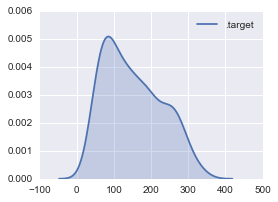

In [19]:
diabetes.sns.kdeplot(shade=True);

You can plot distribution of different columns. When you pass 2 column names, the result will be 2-dimentional.

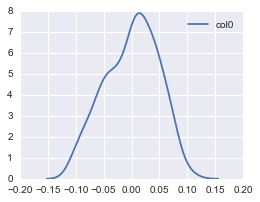

In [20]:
diabetes.sns.kdeplot('col0');

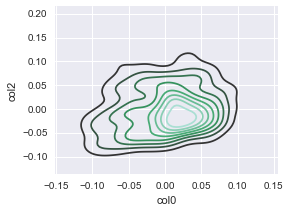

In [21]:
diabetes.sns.kdeplot('col0', 'col2');

You can access to seaborn color pallete via ``.sns`` accessor and provide it to plot methods.

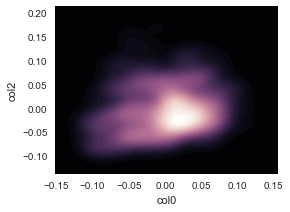

In [22]:
cmap = diabetes.sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
diabetes.sns.kdeplot('col0', 'col2', cmap=cmap, n_levels=60, shade=True);

## Rug plot

``rugplot`` works almost the same as ``distplot``

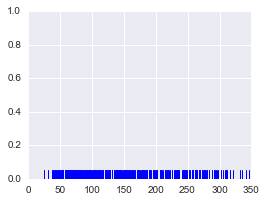

In [23]:
diabetes.sns.rugplot();

Calling plot functions repeatedly will overwrite the current Axes.

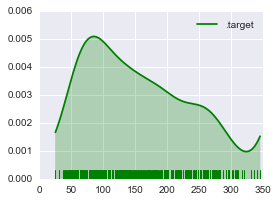

In [24]:
diabetes.sns.kdeplot(color='g', shade=True, cut=0)
diabetes.sns.rugplot(color='g');

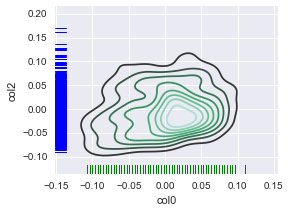

In [25]:
diabetes.sns.kdeplot('col0', 'col2')
diabetes.sns.rugplot('col0', color="g")
diabetes.sns.rugplot('col2', vertical=True);